### SENTIMENT ANALYSIS

Sentiment analysis is a technique used to determine the `emotional tone` or `sentiment expressed` in a text. 
It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is `positive, negative, or neutral`. 

This is used in social media monitoring, customer feedback analysis, and market research.

### 1.GENERAL PROCESSESS INVOLVED

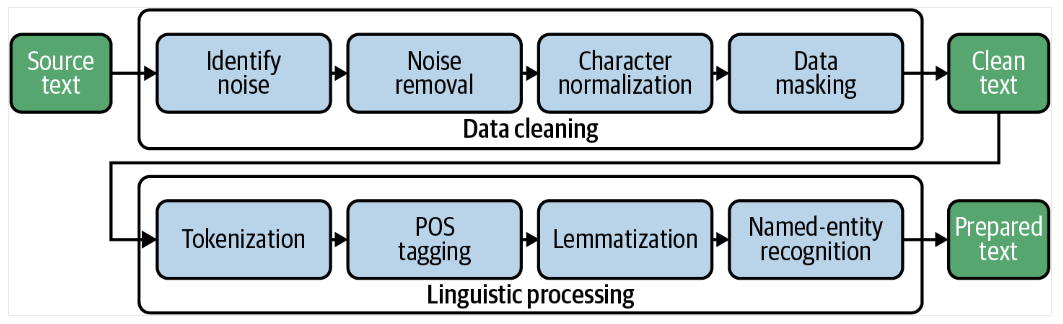

### 2.IMPORTING LIBRARIES & DATASET

-----

import the necessary libraries for text analysis and sentiment analysis
such as `pandas` for data handling, `nltk` for natural language processing, and `SentimentIntensityAnalyzer` for sentiment analysis.

Then download all of the NLTK corpus (a collection of linguistic data) using nltk.download().

-----
Once the environment is set up, we will load a` dataset `of Amazon reviews using pd.read_csv(). This will create a `DataFrame object` in Python that we can use to analyze the data. We'll display the contents of the DataFrame using df.

In [1]:
# internet connectivity required

# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk
nltk.download('all')


# Load the amazon review dataset

df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


# 3. Preprocess text
------
create a function `preprocess_text` in which we first tokenize the documents using `word_tokenize` function from NLTK, then we remove step words using `stepwords module` from NLTK and finally, we lemmatize the filtered_tokens using `WordNetLemmatizer` from NLTK.




In [ ]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())


    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

### 4.NLTK SENTIMENT ANALYSER

Initialize a Sentiment Intensity Analyzer object from the `nltk.sentiment.vader` library.

Define a function called `get_sentiment` that takes a text string as its input. 
The function calls the `polarity_scores` method of the analyzer object to obtain a dictionary of sentiment scores for the text, which includes a score for positive, negative, and neutral sentiment. 

The function will then check whether the positive score is greater than 0 and returns a sentiment score of 1 if it is, and a 0 otherwise. This means that any text with a positive score will be classified as having a positive sentiment, and any text with a non-positive score will be classified as having a negative sentiment.

Apply the `get_sentiment` function to the reviewText column of the df DataFrame using the apply method. 
This creates a new column called sentiment in the DataFrame, which stores the sentiment score for each review. 

Display the updated DataFrame using df.

In [ ]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function
df['sentiment'] = df['reviewText'].apply(get_sentiment)
df

The NLTK sentiment analyzer returns a score between -1 and +1. 

We have used a `cut-off threshold of 0` in the `get_sentiment` function above. 

Anything above 0 is classified as 1 (meaning positive). 

Since we have actual labels, we can evaluate the performance of this method by building a `confusion matrix`.

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

We can also check the Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))